<font size=3> 
    Here I literally use the example shown by: https://docs.astropy.org/en/stable/convolution/index.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve


# Blind15A_16_N24
<font size=3> From Jorges light curve construction we see that for this particular exposure-detector, the worst seeing is 1.4417, this corresponds to the FWHM of the exposure. Therefore we will convolve with a gaussian Kernel that has a fhwm of 1.4417 

In [5]:
worst_seeing = 1.4417
sigma2fwhm = 2.*np.sqrt(2.*np.log(2.)) 
worst_seeing/=sigma2fwhm
arcsec_to_pixel = 0.2626 # arcsec/pixel
worst_seeing/=arcsec_to_pixel # we transform to pixel values 
kernel = Gaussian2DKernel(x_stddev=worst_seeing)

convolved_images = {}



In [16]:
filename = get_pkg_data_filename('Blind15A_16_N24/calexp_DECam_g_g_DECam_SDSS_c0001_4720_0_1520_0_410905_N24_imagDiff_AGN_Blind15A_16_p2.fits')
img = fits.open(filename)[1]

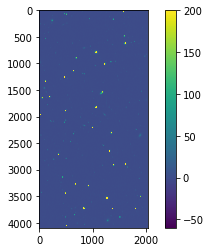

In [20]:
plt.imshow(img.data, vmax=200)
plt.colorbar()

In [21]:
astropy_conv = convolve(img.data, kernel)

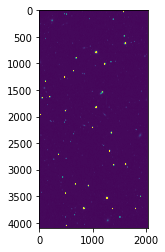

In [24]:
plt.imshow(astropy_conv, vmax=200)